# Model Selection

Using validation sets, cross-validation, for selecting the tuning parameters in stepwise regression, lasso, ridge regression.


In [1]:
library(ISLR)
summary(Hitters)


     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 

In [3]:
# There are some missing values here, so before we proceed we will remove them.
Hitters <- na.omit(Hitters)
with(Hitters, sum(is.na(Salary)))


[1] 0

## Best subset regression

Looks through all possible regression of all different subset sizes and looks for the best of each size.


In [7]:
# install.packages("leaps")
library(leaps)
regfit.full <- regsubsets(Salary ~ ., data = Hitters)
# For each subset size, so for example subset size 1
# it puts a star next to the variable that's in the best subset of size 1.
summary(regfit.full)


Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

In [13]:
# By default, it gives best subsets up to size 8.; Let's increase that to
# 19 (all variables)
regfit.full <- regsubsets(Salary ~ ., data = Hitters, nvmax=19)
reg.summary <- summary(regfit.full)
# Tells you what's on the summary.
# For each of the models we see these statistics.
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 10

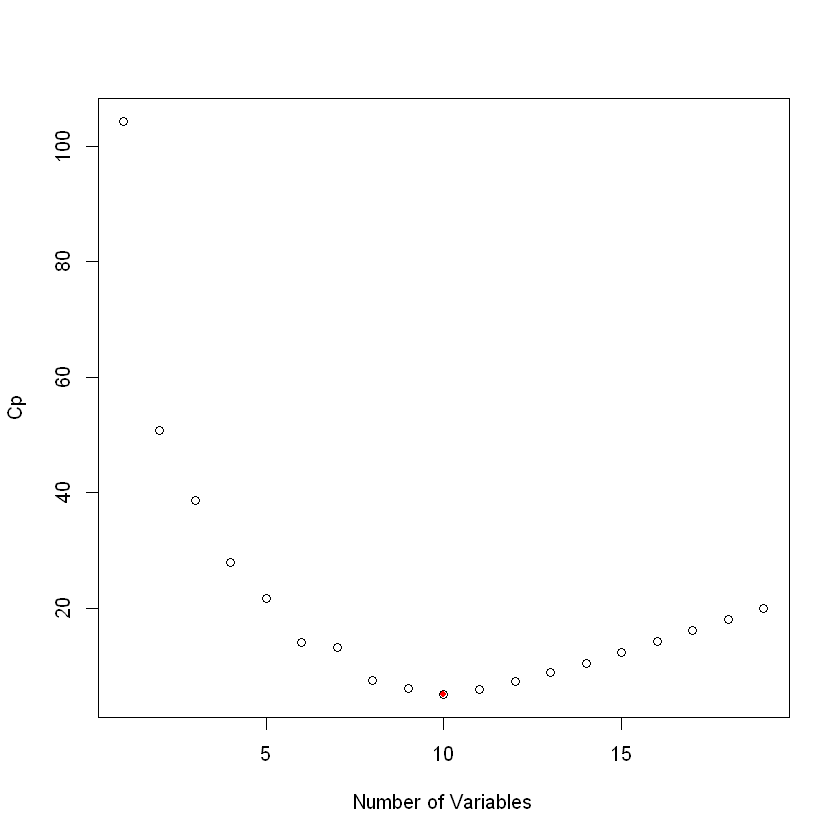

In [20]:
# Cp is an estimate of prediction error.
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "Cp")
# Idea is to pick a model with the lowest Cp.
# Get index of element with smallest Cp component.
which.min(reg.summary$cp)
# Color point with smallest Cp component.
points(10, reg.summary$cp[10], pch = 20, col = "red")

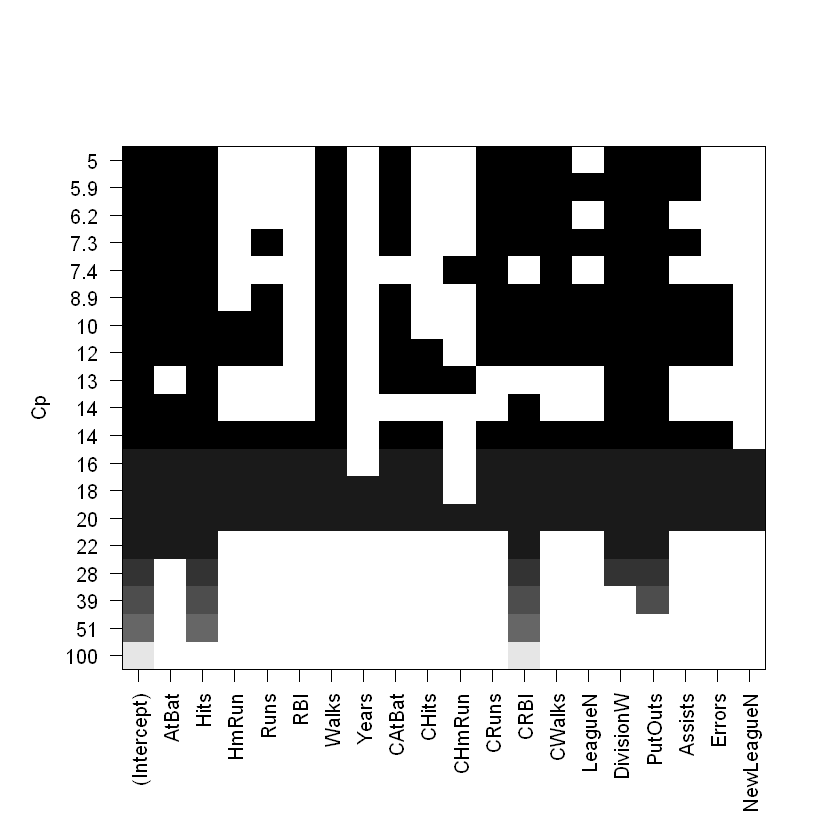

In [21]:
# There is a plot method for the `regsubsets` object
plot(regfit.full, scale="Cp")

In [24]:
# Ask it for the coefficients of 10 variables in model indexed 10.
coef(regfit.full, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680